 # Intro 
 This course will cover different uses of SQL but will focus on data analysis.

## Database 

__Why Businesses Like Databases__

- Data integrity is ensured : only the data you want to be entered is entered, and only certain users are able to enter data into the database.

- Data can be accessed quickly: SQL allows you to obtain results very quickly from the data stored in a database. Code can be optimized to quickly pull results.

- Data is easily shared : multiple individuals can access data stored in a database, and the data is the same for all users allowing for consistent results for anyone with access to your database.
  
In this course, we will mostly be using the Parch & Posey database for our queries. 

Parch & Posey (not a real company) is a paper company and the database includes sales data for their paper.

Using the sales data, you'll be able to put your SQL skills to work with data you would find in the real world.

## Entity Relationship Diagrams (ERD)

An entity-relationship diagram (ERD) is a common way to view data in a database. Below is the ERD for the database we will use from Parch & Posey. These diagrams help you visualize the data you are analyzing including:

- The names of the tables.
- The columns in each table.
- The way the tables work together.

- 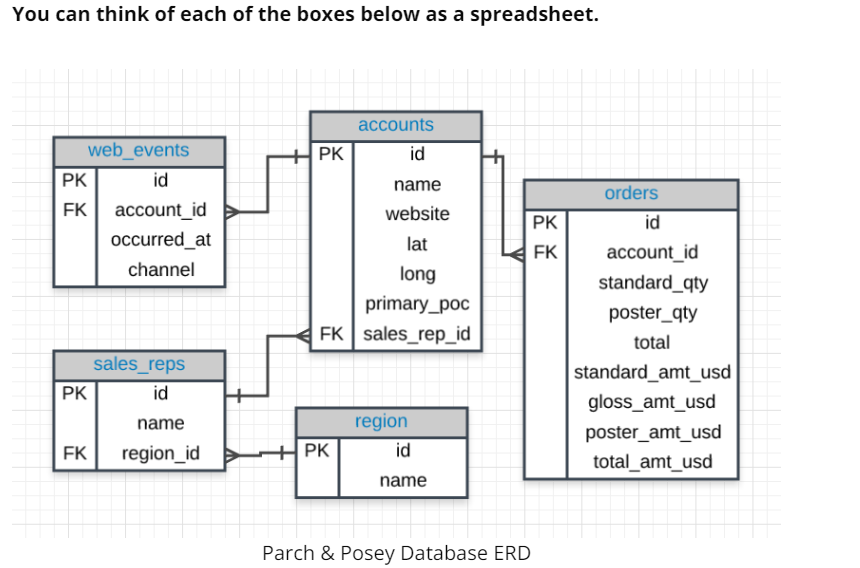

## SQL
SQL is a language that allows you to interact with the database

- SQL is easy to understand.
  
- Traditional databases allow us to access data directly.
  
- SQL is a great tool for analyzing multiple tables at once.

### Statements
The key to SQL is understanding statements. A few statements include:

- CREATE TABLE is a statement that creates a new table in a database- .
- DROP TABLE is a statement that removes a table in a database.
- SELECT allows you to read data and display it. This is called a query.
- 
The SELECT statement is the common statement used by analysts, and you will be learning all about them throughout this course!



### Formatting

#### 1-Using Upper and Lower Case in SQL

SQL queries can be run successfully whether characters are written in upper- or lower-case. In other words, SQL queries are not case-sensitive. The following query:

In [ ]:
SELECT account_id
FROM orders;

# is the same as 

select account_id
from orders;

# also same as

SeLeCt AcCoUnt_id
FrOm oRdErS;

##### Best practice
it is common and best practice to capitalize all SQL commands, like SELECT and FROM, and keep everything else in your query lower case.

In [ ]:
SELECT account_id
FROM orders;

#### 2-White spaces in column names
It is common to use underscores and avoid spaces in column names. It is a bit annoying to work with spaces in SQL. In Postgres, if you have spaces in column or table names, you need to refer to these columns/tables with double quotes around them (Ex: FROM "Table Name" as opposed to FROM table_name). In other environments, you might see this as square brackets instead (Ex: FROM [Table Name]).


#### 3- white spaces in queries
SQL queries ignore spaces, so you can add as many spaces and blank lines between code as you want, and the queries are the same.

In [ ]:
SELECT account_id FROM orders;

'''is equivalent to this query:'''

SELECT account_id
FROM orders

"""and this query (but please don't ever write queries like this):"""

SELECT              account_id

FROM               orders


#### 4- Semicolons

Depending on your SQL environment, your query may need a semicolon at the end to execute. Other environments are more flexible in terms of this being a "requirement." It is considered best practice to put a semicolon at the end of each statement, which also allows you to run multiple queries at once if your environment allows this.

In [ ]:
SELECT account_id
FROM orders;

## SELECT 
__SELECT__ indicates which column(s) you want to be given the data for.

__FROM__ specifies from which table(s) you want to select the columns. Notice the columns need to exist in this table.


In [ ]:
SELECT * 
FROM orders;

SELECT id, account_id, occurred_at
FROM orders;

## LIMIT
We have already seen the SELECT (to choose columns) and FROM (to choose tables) statements. The LIMIT statement is useful when you want to see just the first few rows of a table. This can be much faster for loading than if we load the entire dataset.

In [ ]:
SELECT *
FROM orders
LIMIT 10;

## ORDER BY

- The ORDER BY statement allows us to sort our results using the data in any column. 

- The ORDER BY statement always comes in a query after the SELECT and FROM statements, but before the LIMIT statement. If you are using the LIMIT statement, it will always appear last.
- DESC can be added after the column in your ORDER BY statement to sort in descending order, as the default is to sort in ascending order.
- we can ORDER BY more than one column at a time. When you provide a list of columns in an ORDER BY command, the sorting occurs using the leftmost column in your list first, then the next column from the left, and so on. We still have the ability to flip the way we order using DESC.

In [ ]:
SELECT *
FROM orders
ORDER BY occurred_at
LIMIT 1000;


SELECT  account_id,
        total_amt_usd
FROM orders
ORDER By total_amt_usd DESC, account_id

## WHERE

Using the WHERE statement, we can display subsets of tables based on conditions that must be met. You can also think of the WHERE command as filtering the data.

Common symbols used in WHERE statements include:

- '>' (greater than)

- '<' (less than)

- '>=' (greater than or equal to)

- '<=' (less than or equal to)

- '=' (equal to)

- '!=' (not equal to)

In [ ]:
Explain
SELECT *
FROM orders
WHERE account_id = 4251
ORDER BY occurred_at
LIMIT 1000;

### WHERE (with non numeric data)
The WHERE statement can also be used with non-numeric data. We can use the = and != operators here. You need to be sure to use single quotes (just be careful if you have quotes in the original text) with the text data, not double quotes.

Commonly when we are using WHERE with non-numeric data fields, we use the LIKE, NOT, or IN operators. We will see those before the end of this lesson!

In [ ]:
SELECT *
FROM accounts
WHERE name = 'United Technologies'


SELECT *
FROM accounts
WHERE name != 'United Technologies'

### Derived columns 
Creating a new column that is a combination of existing columns is known as a derived column (or "calculated" or "computed" column). Usually, you want to give a name, or "alias," to your new column using the AS keyword.



In [ ]:
SELECT id, (standard_amt_usd/total_amt_usd)*100 AS std_percent, total_amt_usd
FROM orders
LIMIT 10;

### Logical operators

__LIKE__  : The LIKE operator is frequently used with %. The % tells us that we might want any number of characters leading up to a particular set of characters or following a certain set of characters

In [ ]:
SELECT *
FROM accounts
WHERE website LIKE '%google%';

__IN__ : The IN operator is useful for working with both numeric and text columns. This operator allows you to use an =, but for more than one item of that particular column

In [ ]:
SELECT *
FROM orders
WHERE account_id IN (1001,1021);

__NOT__ : The NOT operator is an extremely useful operator for working with the previous two operators we introduced: IN and LIKE. By specifying NOT LIKE or NOT IN, we can grab all of the rows that do not meet particular criteria.

In [ ]:
SELECT sales_rep_id, 
       name
FROM accounts
WHERE sales_rep_id NOT IN (321500,321570)
ORDER BY sales_rep_id;


SELECT *
FROM accounts
WHERE website NOT LIKE '%com%';

__AND__ : The AND operator is used within a WHERE statement to consider more than one logical clause at a time .

__BETWEEN__ : Sometimes we can make a cleaner statement using BETWEEN than we can use AND.

In [ ]:
WHERE column >= 6 AND column <= 10

WHERE column BETWEEN 6 AND 10


SELECT *
FROM orders
WHERE occurred_at >= '2016-04-01' AND occurred_at <= '2016-10-01'
ORDER BY occurred_at


SELECT *
FROM orders
WHERE occurred_at BETWEEN '2016-04-01' AND '2016-10-01'
ORDER BY occurred_at

__OR__ : the OR operator can combine multiple statements. Each time you link a new statement with an OR, you will need to specify the column you are interested in looking at.

In [ ]:
SELECT account_id,
       occurred_at,
       standard_qty,
       gloss_qty,
       poster_qty
FROM orders
WHERE standard_qty = 0 OR gloss_qty = 0 OR poster_qty = 0

## JOIN
 The whole purpose of JOIN statements is to allow us to pull data from more than one table at a time.
 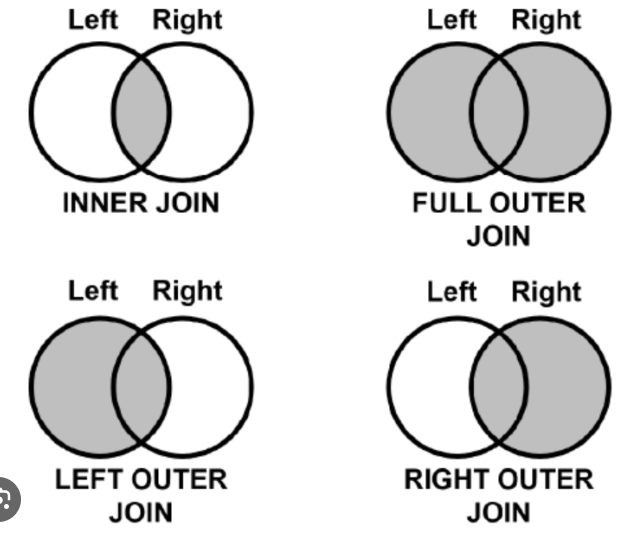

In [ ]:
SELECT orders.*,
       accounts.*
FROM orders 
JOIN accounts
ON orders.account_id = accounts.id;

##### Note : Difference between filtering inside JOIN or after JOIN
- Filter Inside Join Clause: Filters the data before the join operation.- 
Filter in a WHERE Statement after Join Clause: Filters the data after the join operation has been executed

Both will yield same results in INNER JOIN , but they night yield different results in LEFT JOIN

consider the following data : 

  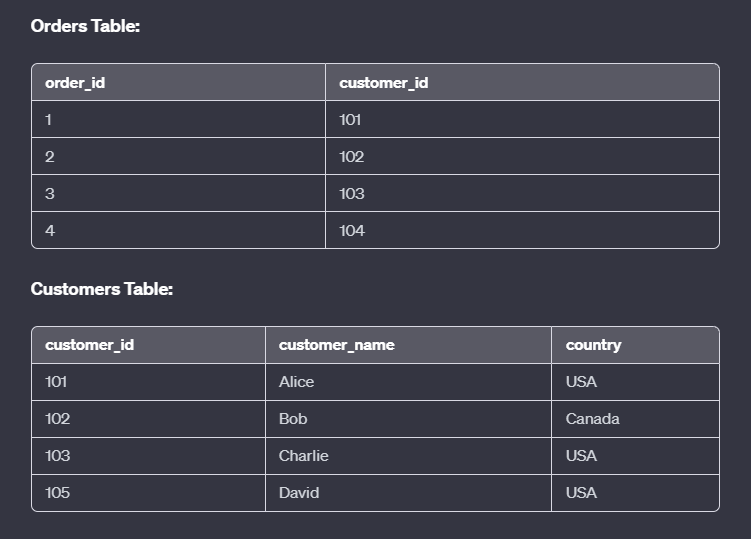

  .

In [ ]:
SELECT Orders.order_id, Customers.customer_name
FROM Orders
LEFT JOIN Customers 
ON Orders.customer_id = Customers.customer_id
AND Customers.country = 'USA';

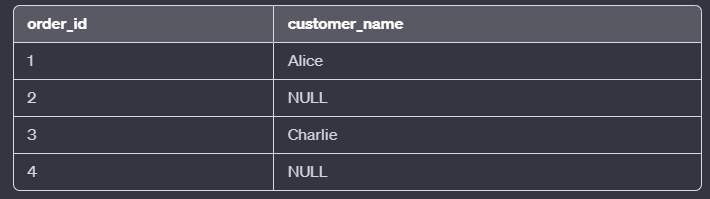

In [ ]:
SELECT Orders.order_id, Customers.customer_name
FROM Orders
LEFT JOIN Customers ON Orders.customer_id = Customers.customer_id
WHERE Customers.country = 'USA';


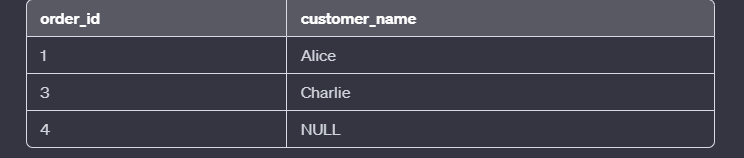

__SELF JOIN__ : 
Self-joins are a type of SQL join where a table is joined with itself. This involves creating two instances of the same table within the query and using them to establish a relationship between different rows within the same table.

In [ ]:
SELECT e.employee_id, e.employee_name, m.employee_name AS manager_name
FROM employees e
INNER JOIN employees m ON e.manager_id = m.employee_id;

## Aggregations 
__simple aggregations__ : without using group by , you can mayby count the number of rows , get avg of a column etc ..
- Notice that COUNT does not consider rows that have NULL values. 
- If you want to count all rows even with null values use *
- AVG ignores nulls completeley in denomenator and numerator
- if you want to treat nulls as zeros divide sum and count(*)


In [ ]:
SELECT COUNT(*)
FROM accounts;

__GROUP BY__ : GROUP BY can be used to aggregate data within subsets of the data.

- Any column in the SELECT statement that is not within an aggregator must be in the GROUP BY clause.
- The GROUP BY always goes between WHERE and ORDER BY.


__HAVING__ : HAVING is the “clean” way to filter a query that has been aggregated, but this is also commonly done using a subquery. Essentially, any time you want to perform a WHERE on an element of your query that was created by an aggregate, you need to use HAVING instead.

So if you want to filter on the result of the aggregate you should use HAVING , and if you want to filter before applying the aggregate you should use wher

In [ ]:
SELECT account_id,
       SUM(total_amt_usd) AS sum_total_amt_usd
FROM orders
GROUP BY 1
HAVING SUM(total_amt_usd) >= 250000

## DISTINCT
DISTINCT is always used in SELECT statements, and it provides the unique rows for all columns written in the SELECT statement. Therefore, you only use DISTINCT once in any particular SELECT statement.

In [ ]:
SELECT DISTINCT column1, column2, column3
FROM table1;

## Date
Dates in SQL are managed using various functions and operators that allow manipulation and extraction of specific components like year, month, day, etc. Two commonly used functions for dealing with dates are DATE_TRUNC and DATE_PART.

__DATE_TRUNC Function__ : It helps in aggregating data over specific intervals like months, quarters, or years.
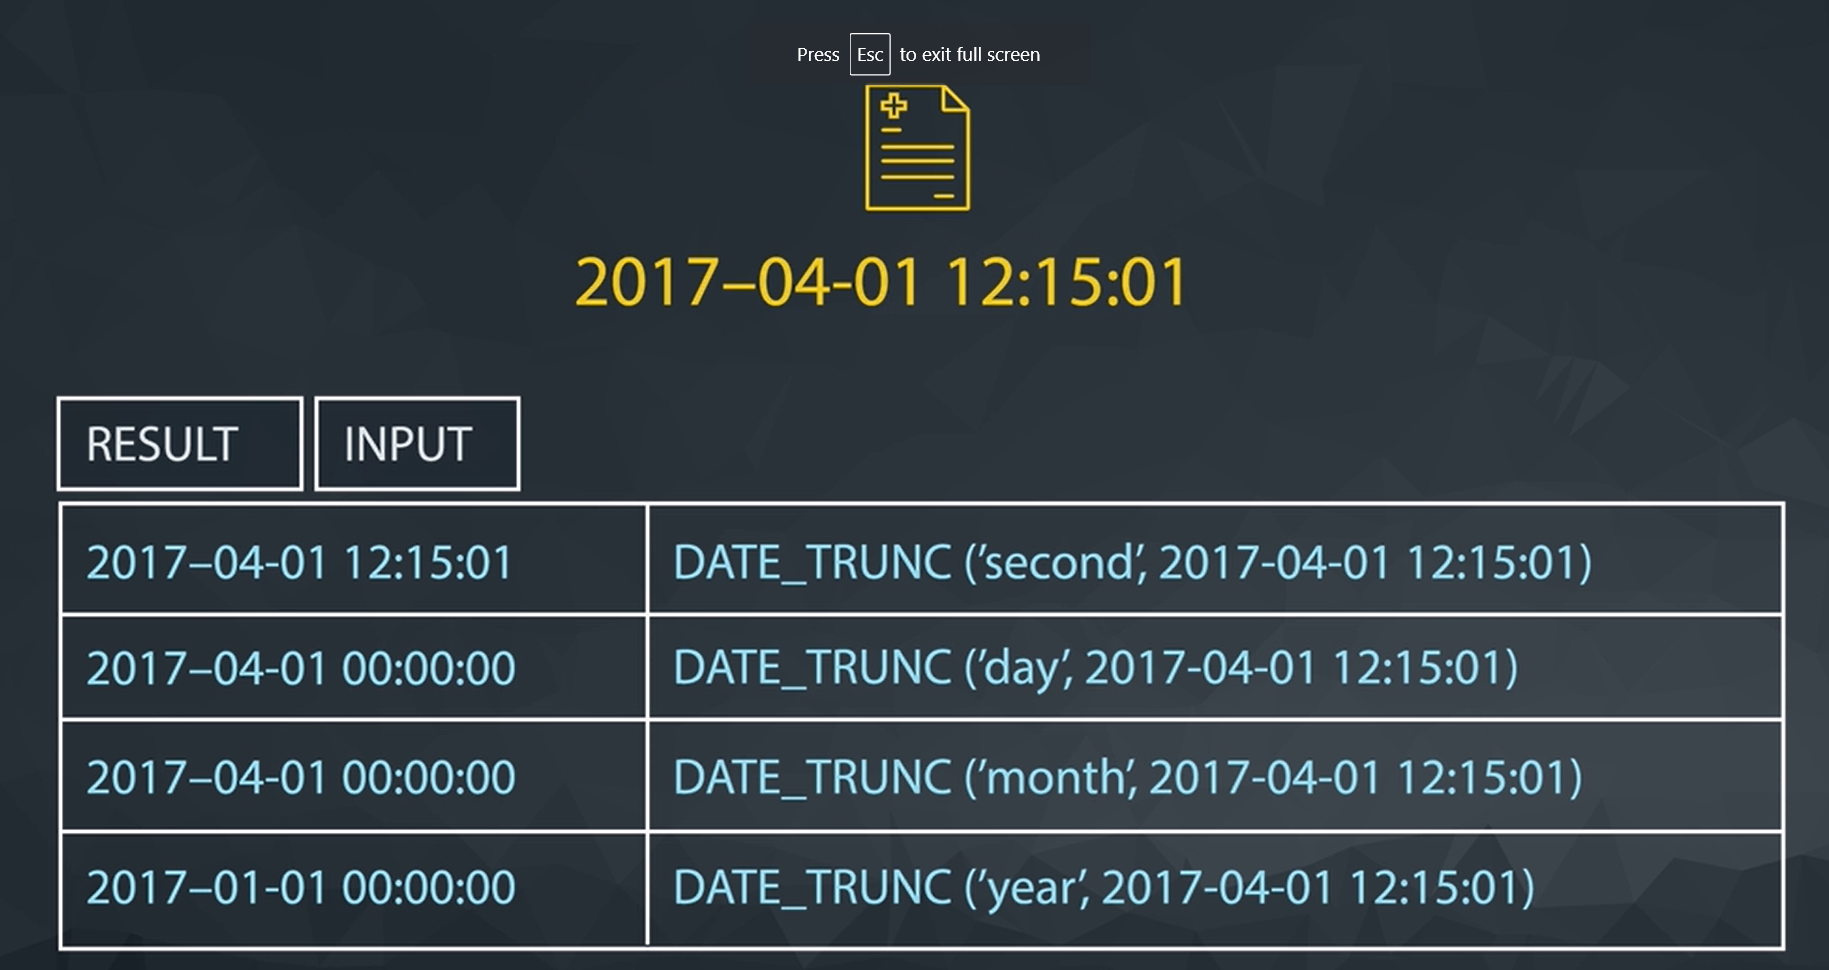

In [ ]:
DATE_TRUNC('month', date_column)

__DATE_PART Function__ : This function extracts a specific part (year, month, day, etc.) from a date. For instance.
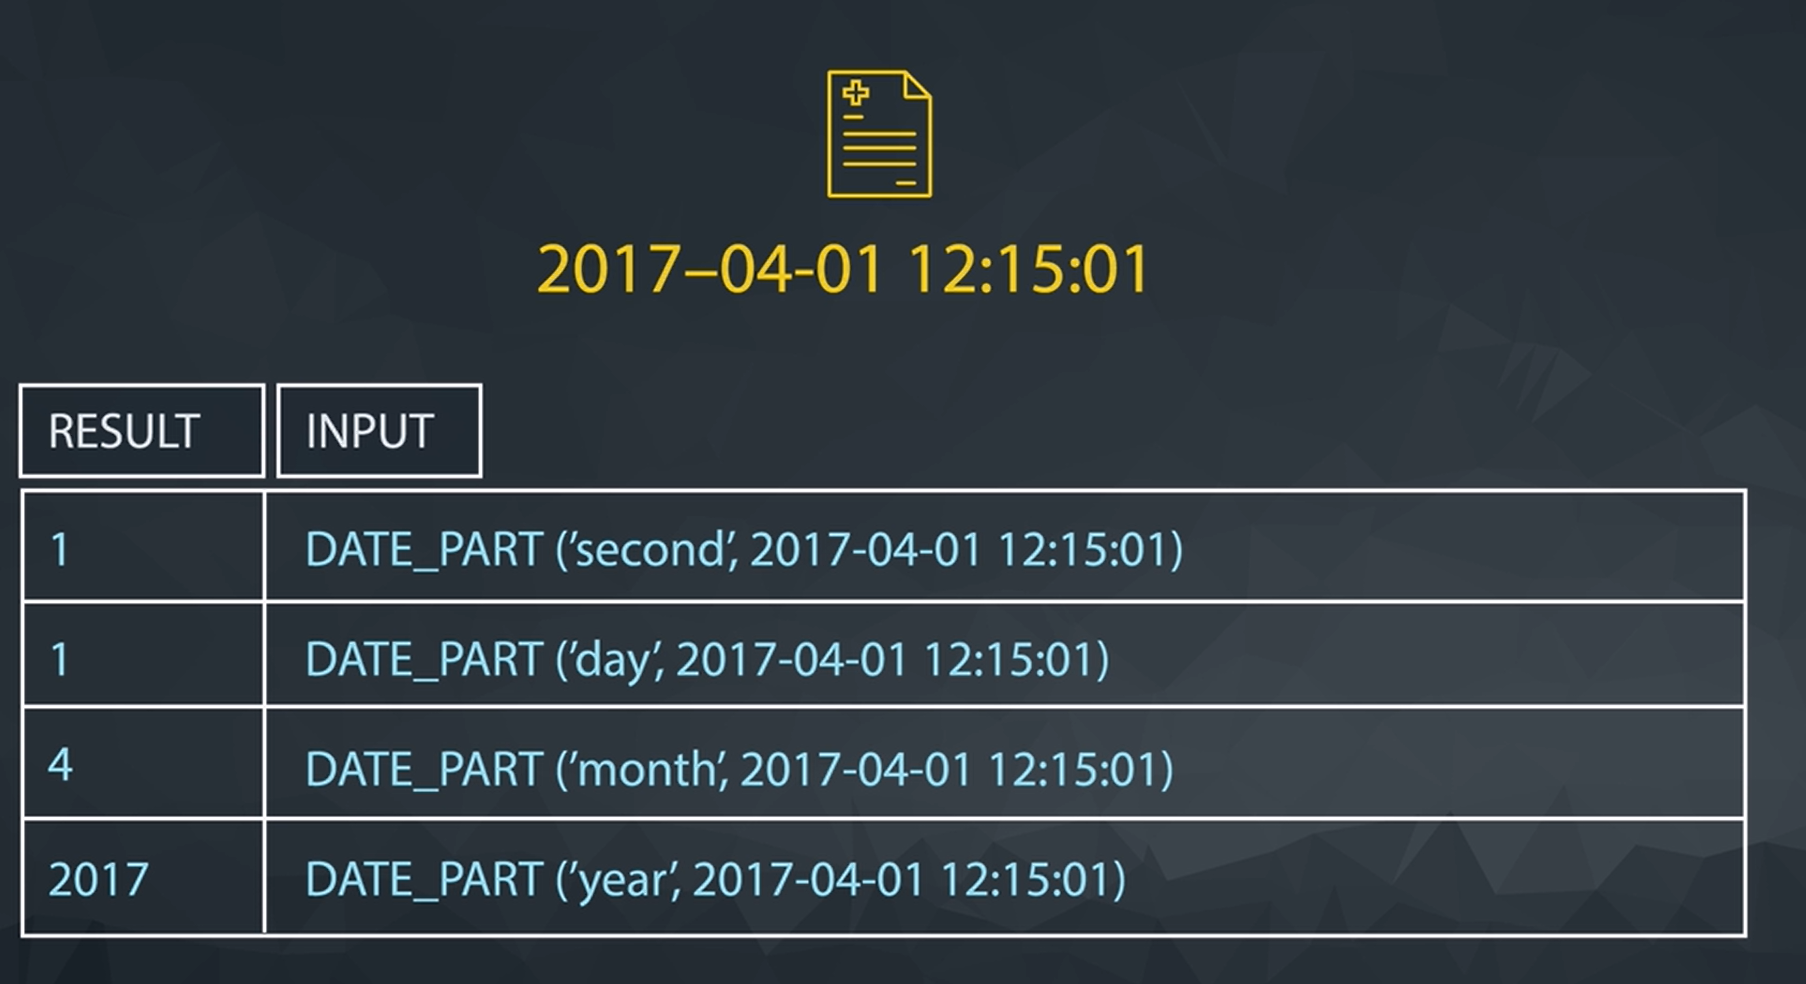

In [ ]:
DATE_PART('year', date_column)

## CASE STATEMENT
CASE statements in SQL provide conditional logic within queries. They're used to perform different actions based on specific conditions.



In [ ]:
SELECT
    product_name,
    CASE
        WHEN price > 100 THEN 'Expensive'
        WHEN price > 50 THEN 'Moderate'
        ELSE 'Inexpensive'
    END AS price_category
FROM
    products;


## SUB QUERIES
You need to use a subquery when you have the need to manipulate an existing table to “pseudo-create” a table that is then used as a part of a larger query.

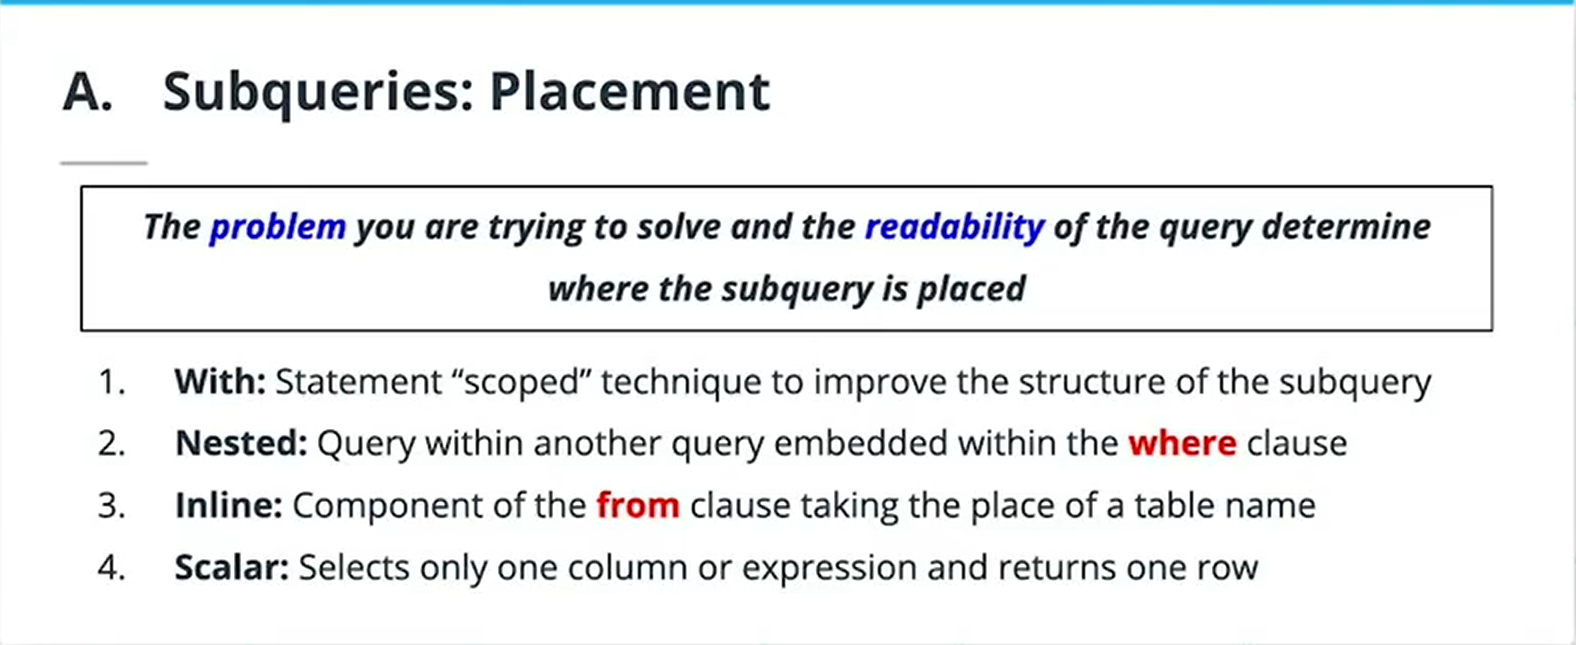

In [ ]:
# Nested example
SELECT *
FROM orders
WHERE DATE_TRUNC('month',occurred_at) =
 (SELECT DATE_TRUNC('month',MIN(occurred_at)) AS min_month
  FROM orders)
ORDER BY occurred_at

#WITH statement
WITH table1 AS (
          SELECT *
          FROM web_events),

     table2 AS (
          SELECT *
          FROM accounts)

SELECT *
FROM table1
JOIN table2
ON table1.account_id = table2.id;


#Views
CREATE VIEW V1
AS
SELECT s.id, s.name as rep_name, r.name as region_name
FROM sales_reps s
JOIN region r
ON s.region_id = r.id
AND r.name = 'Northeast';


#Scalar 
SELECT 
   (SELECT MAX(salary) FROM employees_db) AS top_salary,
   employee_name
FROM employees_db;


### Data Cleaning
__Left__: Extracts a number of characters from a string starting from the left.

__Right__: Extracts a number of characters from a string starting from the right.

__Substr__: Extracts a substring from a string (starting at any position)

In [ ]:
LEFT(student_information, 8) AS student_id

RIGHT(student_information, 6) AS salary

SUBSTR(string, start, length) 
SUBSTR(student_information, 11, 1) AS gender



__Concat__ : Adds two or more expressions together

In [ ]:
CONCAT(string1, string2, string3)
CONCAT(month, '-', day, '-', year) AS date

__CAST__ :Converts a value of any type into a specific, different data type

In [ ]:
CAST(expression AS datatype)
CAST(salary AS int)

__POSITION , STR_POS__ :Returns the position of the first occurrence of a substring in a string

In [ ]:
SELECT POSITION('world' IN 'Hello world'); -- Returns 7
SELECT STRPOS('Hello world', 'world'); -- Returns 7 in PostgreSQL, but in MySQL, you'd use LOCATE('world', 'Hello world') which also returns 7


__Coalesce__ :  is a function used in SQL to return the first non-null expression among its arguments. It's quite handy for handling null values in SQL queries.



In [ ]:
COALESCE(value1, value2, ...)
SELECT COALESCE(NULL, 5, 10); -- Returns 5
SELECT COALESCE(column_name, 'Not available') FROM table_name;
SELECT COALESCE(col1, col2, col3, 'No value found') FROM table_name;
SELECT COALESCE(date_column, CURRENT_DATE) FROM table_name;


### Window functions
A window function is a calculation across a set of rows in a table that are somehow related to the current row. This means we’re typically:

Calculating running totals that incorporate the current row or,
Ranking records across rows, inclusive of the current one
A window function is similar to aggregate functions combined with group by clauses but have one key difference: Window functions retain the total number of rows between the input table and the output table (or result). Behind the scenes, the window function is able to access more than just the current row of the query result.

__Partition by__: A subclause of the OVER clause. Similar to GROUP BY.

__Over__: Typically precedes the partition by that signals what to “GROUP BY”.

__Aggregates__: Aggregate functions that are used in window functions, too (e.g., sum, count, avg).

In [ ]:
AGGREGATE_FUNCTION (column_1) OVER
 (PARTITION BY column_2 ORDER BY column_3)
  AS new_column_name;

__Row_number()__: Ranking is distinct amongst records even with ties in what the table is ranked against.

__Rank()__: Ranking is the same amongst tied values and ranks skip for subsequent values.

__Dense_rank()__: Ranking is the same amongst tied values and ranks do not skip for subsequent values.

In [ ]:
SELECT ROW_NUMBER() OVER(ORDER BY date_time) AS rank,
       date_time
FROM   db;


SELECT RANK() OVER(ORDER BY date_time) AS rank,
       date_time
FROM   db;


SELECT DENSE_RANK() OVER(ORDER BY date_time) AS rank,
       date_time
FROM   db;


In [ ]:
SELECT order_id,
       order_total,
       order_price,
       SUM(order_total) OVER monthly_window AS running_monthly_sales,
       COUNT(order_id) OVER monthly_window AS running_monthly orders,
       AVG(order_price) OVER monthly_window AS average_monthly_price
FROM   amazon_sales_db
WHERE  order_date < '2017-01-01'
WINDOW monthly_window AS
       (PARTITION BY month(order_date) ORDER BY order_date);

__NTILE__ : 
is a powerful window function in SQL that allows you to divide a result set into a specified number of roughly equal groups or "buckets" based on a specific ordering within the window.

In [ ]:
NTILE(# of buckets) OVER (ORDER BY ranking_column) AS new_column_name

SELECT  customer_id,
        composite_score,
        NTILE(100) OVER(ORDER BY composite_score) AS percentile
FROM    customer_lead_score;

__LAG__ :  retrieves data from a previous row in the result set within the specified window. You can use it to fetch the value from a previous row based on a particular ordering.

__LEAD__ : retrieves data from a subsequent row in the result set within the specified window. It enables you to get the value from a following row based on a particular ordering.

In [ ]:
SELECT 
    id,
    value,
    LAG(value) OVER (ORDER BY id) AS previous_value,
    LEAD(value) OVER (ORDER BY id) AS next_value
FROM 
    your_table;


### UNION
The UNION operator is used to combine the result sets of 2 or more SELECT statements. It removes duplicate rows between the various SELECT statements.

Each SELECT statement within the UNION must have the same number of fields in the result sets with similar data types
.
Typically, the use case for leveraging the UNION command in SQL is when a user wants to pull together distinct values of specified columns that are spread across multiple tables. For example, a chef wants to pull together the ingredients and respective aisle across three separate meals that are maintained within different table

__NOTE__

UNION removes duplicate rows.

UNION ALL does not remove duplicate rows.s.

### PERFORMANCE TUNING